# Challenge Set 8 - Alison Glazer
Topic: Challenge Set 8 Subject: Classification Error Metrics Date: 10/20/2019 Name: Alison Glazer Worked with: -- Location: https://github.com/alisonglazer/metis_challenges/blob/master/challenge_set_8_alison.ipynb

In [2]:
import sys
print("Python Version:", sys.version)

Python Version: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [3]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


## **CHALLENGE 1**

**Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.



In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header=None)

In [5]:
# Replace y with 1 and n with 0
df.replace(to_replace=['y','n','?'],value=[1,0,np.nan],inplace=True)

# Fill nans with column mean
df.fillna(value=df.mean(),inplace=True)

# Set democrat=1,republican=0
df.replace(to_replace=['democrat','republican'],value=[1,0],inplace=True)

In [6]:
# Set up features and target
y = df[0]
X_cols = np.arange(1,df.shape[1])
X = df[X_cols]

In [7]:
# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=4444, stratify=y)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train);
print('LogReg Accuracy = {:5f}'.format(accuracy_score(y_test,knn.predict(X_test))))

logreg = LogisticRegression(C=10,solver='lbfgs')
logreg.fit(X_train,y_train);
print('LogReg Accuracy = {:5f}'.format(accuracy_score(y_test,logreg.predict(X_test))))

gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('GaussianNB Accuracy = {:5f}'.format(accuracy_score(y_test,gnb.predict(X_test))))

svc = SVC()
svc.fit(X_train,y_train)
print('Support Vector Machine Accuracy = {:5f}'.format(accuracy_score(y_test,gnb.predict(X_test))))

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('Decision Tree Accuracy = {:5f}'.format(accuracy_score(y_test,dt.predict(X_test))))

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print('Random Forest Accuracy = {:5f}'.format(accuracy_score(y_test,rf.predict(X_test))))

LogReg Accuracy = 0.954198
LogReg Accuracy = 0.977099
GaussianNB Accuracy = 0.969466
Support Vector Machine Accuracy = 0.969466
Decision Tree Accuracy = 0.969466
Random Forest Accuracy = 0.969466


/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
# Calculate precision, recall, f1

In [18]:
# using the default threshold of 0.5, which is what vanilla predict does
y_pred_lr = logreg.predict(X_test)
print("Log Reg Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(precision_score(y_test, y_pred_lr), 
                                                     recall_score(y_test, y_pred_lr),f1_score(y_test, y_pred_lr)))

y_pred_knn = knn.predict(X_test)
print("KNN Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(precision_score(y_test, y_pred_knn), 
                                                     recall_score(y_test, y_pred_knn),f1_score(y_test, y_pred_knn)))

y_pred = gnb.predict(X_test)
print("Gaussian NB Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(precision_score(y_test, y_pred), 
                                                     recall_score(y_test, y_pred),f1_score(y_test, y_pred)))
y_pred = svc.predict(X_test)
print("Support Vector Machine Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(precision_score(y_test, y_pred), 
                                                     recall_score(y_test, y_pred),f1_score(y_test, y_pred)))
y_pred = dt.predict(X_test)
print("Decision Tree Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(precision_score(y_test, y_pred), 
                                                     recall_score(y_test, y_pred),f1_score(y_test, y_pred)))
y_pred = rf.predict(X_test)
print("Random Forest Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(precision_score(y_test, y_pred), 
                                                     recall_score(y_test, y_pred),f1_score(y_test, y_pred)))


Log Reg Default threshold:
Precision: 0.9639,   Recall: 1.0000, f1: 0.9816
KNN Default threshold:
Precision: 0.9512,   Recall: 0.9750, f1: 0.9630
Gaussian NB Default threshold:
Precision: 0.9634,   Recall: 0.9875, f1: 0.9753
Support Vector Machine Default threshold:
Precision: 0.9753,   Recall: 0.9875, f1: 0.9814
Decision Tree Default threshold:
Precision: 0.9634,   Recall: 0.9875, f1: 0.9753
Random Forest Default threshold:
Precision: 0.9634,   Recall: 0.9875, f1: 0.9753


## **CHALLENGE 2**

ROC AUC score =  0.9938725490196079


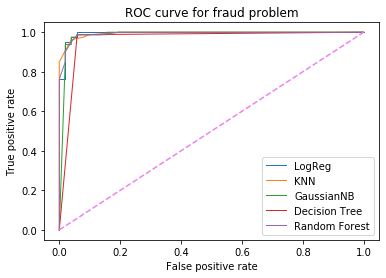

In [34]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
# fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc.predict_proba(X_test)[:,1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])


plt.plot(fpr_lr, tpr_lr,lw=1)
plt.plot(fpr_knn, tpr_knn,lw=1)
plt.plot(fpr_gnb, tpr_gnb,lw=1)
# plt.plot(fpr_svc, tpr_svc,lw=1)
plt.plot(fpr_dt, tpr_dt,lw=1)
plt.plot(fpr_rf, tpr_rf,lw=1)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem')
plt.legend(['LogReg','KNN','GaussianNB','Decision Tree','Random Forest']);
print("ROC AUC score = ", roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

## **CHALLENGE 3**

In [36]:
from sklearn.model_selection import cross_val_score

In [38]:
def cv_score(model, score):
    return np.mean(cross_val_score(model,X,y,scoring=score,cv=5))

In [47]:
print('Calculate Metrics with Cross Validation')
print("Log Reg Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(cv_score(LogisticRegression(solver='lbfgs'),'precision'), 
                                                     cv_score(logreg,'recall'),cv_score(logreg,'f1')))

print("KNN Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(cv_score(KNeighborsClassifier(n_neighbors=5),'precision'), 
                                                     cv_score(logreg,'recall'),cv_score(logreg,'f1')))

print("Gaussian NB Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(cv_score(GaussianNB(),'precision'), 
                                                     cv_score(logreg,'recall'),cv_score(logreg,'f1')))

print("Support Vector Machine Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(cv_score(SVC(),'precision'), 
                                                     cv_score(logreg,'recall'),cv_score(logreg,'f1')))

print("Decision Tree Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(cv_score(DecisionTreeClassifier(),'precision'), 
                                                     cv_score(logreg,'recall'),cv_score(logreg,'f1')))

print("Random Forest Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(cv_score(RandomForestClassifier(),'precision'), 
                                                     cv_score(logreg,'recall'),cv_score(logreg,'f1')))


Calculate Metrics with Cross Validation
Log Reg Default threshold:
Precision: 0.9696,   Recall: 0.9700, f1: 0.9699
KNN Default threshold:
Precision: 0.9623,   Recall: 0.9700, f1: 0.9699
Gaussian NB Default threshold:
Precision: 0.9582,   Recall: 0.9700, f1: 0.9699
Support Vector Machine Default threshold:


/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/

Precision: 0.9772,   Recall: 0.9700, f1: 0.9699
Decision Tree Default threshold:
Precision: 0.9591,   Recall: 0.9700, f1: 0.9699
Random Forest Default threshold:


/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-package

Precision: 0.9772,   Recall: 0.9700, f1: 0.9699


## **CHALLENGE 4**

In [48]:
df = pd.read_csv('challenges_data/2013_movies.csv')

In [49]:
df.ReleaseDate = pd.to_datetime(df.ReleaseDate)
df['month'] = df.ReleaseDate.map(lambda x: x.month)

df.Budget.fillna(df.Budget.mean(),inplace=True)

In [50]:
df['RuntimeCat'] = df.Runtime
df.RuntimeCat[df.Runtime>100] = 1
df.RuntimeCat[df.Runtime<=100] = 0

/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
y=df['RuntimeCat']
X_cols = ['Budget','DomesticTotalGross','month']
X = df[X_cols]

In [54]:
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=4444,stratify=y)

scaler = StandardScaler()


# Fit the scaler using the training data and scale it
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values),
                              columns=X.columns)

# Scale the test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train_scaled,y_train)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

print("Log Reg Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(precision_score(y_test, lr.predict(X_test_scaled)), 
                                                     recall_score(y_test, lr.predict(X_test_scaled)),f1_score(y_test, lr.predict(X_test_scaled))))

print("KNN Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(precision_score(y_test, knn.predict(X_test_scaled)), 
                                                     recall_score(y_test, knn.predict(X_test_scaled)),f1_score(y_test, knn.predict(X_test_scaled))))


Log Reg Default threshold:
Precision: 0.7000,   Recall: 1.0000, f1: 0.8235
KNN Default threshold:
Precision: 0.6923,   Recall: 0.8571, f1: 0.7660


## **CHALLENGE 5**

In [56]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None)

In [64]:
# Use logistic regression 
# 1 = survival
df[3].replace(to_replace=2,value=0,inplace=True)

X=df.loc[:,0:2]
y=df[3]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=3,random_state=4444,stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

lr=LogisticRegression(solver='lbfgs')
lr.fit(X_train_scaled,y_train)
accuracy_score(y_test,lr.predict(X_test_scaled))

0.6666666666666666

ROC AUC score =  1.0


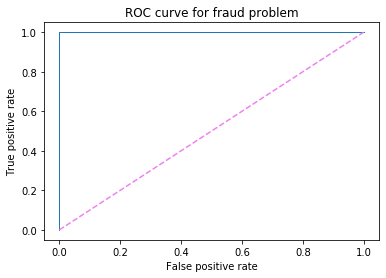

In [63]:
# Plot ROC curve, calculate AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:,1])


plt.plot(fpr_lr, tpr_lr,lw=1)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem')
print("ROC AUC score = ", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))